In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df_ny_bus_delay = pd.read_csv("bus-breakdown-and-delays.csv")
df_ny_bus_delay.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,New Jersey,...,NaN,11.0,Yes,No,Yes,2015-11-05T08:12:00.000,NaN,2015-11-05T08:12:14.000,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,Manhattan,...,20MNS,2.0,Yes,Yes,No,2015-11-05T08:12:00.000,NaN,2015-11-05T08:13:34.000,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05T08:09:00.000,2015-11-05T08:13:00.000,Bronx,...,15MIN,8.0,Yes,Yes,Yes,2015-11-05T08:13:00.000,NaN,2015-11-05T08:13:22.000,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05T08:12:00.000,2015-11-05T08:14:00.000,Manhattan,...,15 MIN,6.0,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:04.000,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05T08:13:00.000,2015-11-05T08:14:00.000,Manhattan,...,NaN,6.0,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:08.000,Running Late,School-Age


In [3]:
import pandas as pd

# Load the dataset
df_ny_bus_delay = pd.read_csv("bus-breakdown-and-delays.csv")

# Check the unique values in the 'Reason' column
unique_reasons = df_ny_bus_delay['Reason'].unique()

# Display the unique reasons
print(unique_reasons)


['Heavy Traffic' 'Flat Tire' 'Other' 'Won`t Start' 'Mechanical Problem'
 'Problem Run' 'Accident' 'Late return from Field Trip'
 'Delayed by School' 'Weather Conditions']


In [4]:
df_ny_bus_delay.dropna(inplace=True)

In [5]:
import pandas as pd
import numpy as np

def parse_delay(x):
    if pd.isna(x) or not isinstance(x, str):
        return np.nan
    digits = ''.join(filter(str.isdigit, x))
    return int(digits) if digits else np.nan

df = pd.read_csv("bus-breakdown-and-delays.csv", low_memory=False)

df["How_Long_Delayed"] = df["How_Long_Delayed"].apply(parse_delay)


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime


df = pd.read_csv("bus-breakdown-and-delays.csv", low_memory=False)


df["Occurred_On"] = pd.to_datetime(df["Occurred_On"], errors="coerce")
df["Year"] = df["Occurred_On"].dt.year
df["Month"] = df["Occurred_On"].dt.month
df["Day"] = df["Occurred_On"].dt.day
df["Hour"] = df["Occurred_On"].dt.hour
df["Minute"] = df["Occurred_On"].dt.minute


label_enc = LabelEncoder()
df["Reason"] = label_enc.fit_transform(df["Reason"].astype(str))
df["Boro"] = label_enc.fit_transform(df["Boro"].astype(str))


def parse_delay(x):
    if pd.isna(x) or not isinstance(x, str):  # Handle NaN and non-string values
        return np.nan
    digits = ''.join(filter(str.isdigit, x))  # Extract numeric values
    return int(digits) if digits else np.nan  # Convert to int if digits exist

df["How_Long_Delayed"] = df["How_Long_Delayed"].apply(parse_delay)

# Drop rows with missing delay values
df = df.dropna(subset=["How_Long_Delayed"])

# Select features and target
X = df[["Year", "Month", "Day", "Hour", "Minute", "Reason", "Boro"]]
y = df["How_Long_Delayed"]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print dataset shape
print(f"Feature shape: {X_scaled.shape}, Target shape: {y.shape}")


Feature shape: (52158, 7), Target shape: (52158,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}")


Linear Regression - MAE: 545.0623078072219, MSE: 1771783.4988337052


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


print("Random Forest R² Score:", rf_reg.score(X_test, y_test))


Random Forest R² Score: 0.08037879563533445


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Reshape for CNN input (samples, timesteps, features)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN Model
cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation="relu", input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1)  # Regression output
])

cnn.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train CNN
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=16, validation_data=(X_test_cnn, y_test))

# Evaluate
y_pred_cnn = cnn.predict(X_test_cnn).flatten()
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
print(f"CNN - MAE: {mae_cnn}, MSE: {mse_cnn}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2608/2608 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2246690.7500 - mae: 511.0762 - val_loss: 1693729.7500 - val_mae: 416.8006
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2789635.0000 - mae: 439.9712 - val_loss: 1693191.5000 - val_mae: 414.9131
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 825437.1250 - mae: 432.1861 - val_loss: 1693739.7500 - val_mae: 441.8784
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1561531.5000 - mae: 438.2523 - val_loss: 1693475.3750 - val_mae: 448.9564
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 651711.9375 - mae: 431.7347 - val_loss: 1693528.5000 - val_mae: 439.9472
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1939925.0000 - mae: 444.7146 - val_loss: 1691851.6250 - val_mae: 434.2802
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 895448.8750 - mae: 432.0521 - val_loss: 1691888.8750 - val_mae: 424.4255
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 

Epoch 1/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2831681.5000 - mae: 448.2215 - val_loss: 1691703.7500 - val_mae: 421.5187
Epoch 2/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 742184.5625 - mae: 436.2001 - val_loss: 1691497.3750 - val_mae: 437.9768
Epoch 3/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 675344.6250 - mae: 426.2437 - val_loss: 1689503.6250 - val_mae: 413.8690
Epoch 4/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1052710.2500 - mae: 433.0553 - val_loss: 1689196.7500 - val_mae: 434.0293
Epoch 5/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1148660.2500 - mae: 427.7600 - val_loss: 1688140.7500 - val_mae: 413.2575
Epoch 6/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 607132.8125 - mae: 423.9377 - val_loss: 1686901.6250 - val_mae: 426.5616
Epoch 7/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1398850.0000 - mae: 436.8351 - val_loss: 1687052.0000 - val_mae: 418.1174
Epoch 8/10
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms

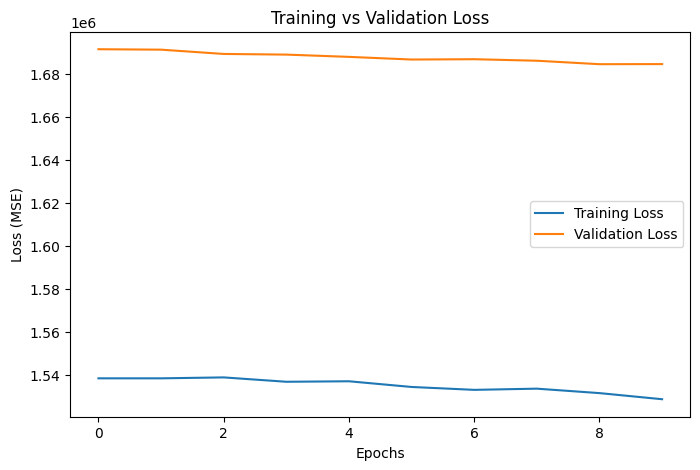

In [10]:
import matplotlib.pyplot as plt

# Train CNN and store history
history = cnn.fit(
    X_train_cnn, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_test_cnn, y_test),
    verbose=1
)

# Plot training loss and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [25]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [37]:
from tensorflow.keras.layers import BatchNormalization

cnn = Sequential([
    Conv1D(filters=128, kernel_size=2, activation="relu", input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=2, activation="relu"),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),  # Increase dropout to prevent overfitting
    Dense(64, activation="relu"),
    Dense(1)  # Regression output
])

cnn.compile(optimizer="adam", loss="mse", metrics=["mae"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = cnn.fit(
    X_train_cnn, y_train,
    epochs=50,  # More epochs
    batch_size=16,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 516.7494 - mae: 17.7155 - val_loss: 636.9181 - val_mae: 20.7119
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 532.5494 - mae: 9.5595 - val_loss: 629.0097 - val_mae: 20.6638
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 229.9004 - mae: 8.4134 - val_loss: 598.2250 - val_mae: 19.9218
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.5600 - mae: 8.0473 - val_loss: 551.8154 - val_mae: 18.8484
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 394.0564 - mae: 9.4596 - val_loss: 551.3534 - val_mae: 19.0517
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 285.4788 - mae: 8.2607 - val_loss: 517.7103 - val_mae: 18.1555
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 232.0392 - mae: 8.5755 - val_loss: 469.7886 - val_mae: 16.9361
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 233.1476 - mae: 8.3408 - val_loss: 417.8095 - val_mae: 15.7504
Epoch 9/50
35/35 ━━━━━━━━━━━━━

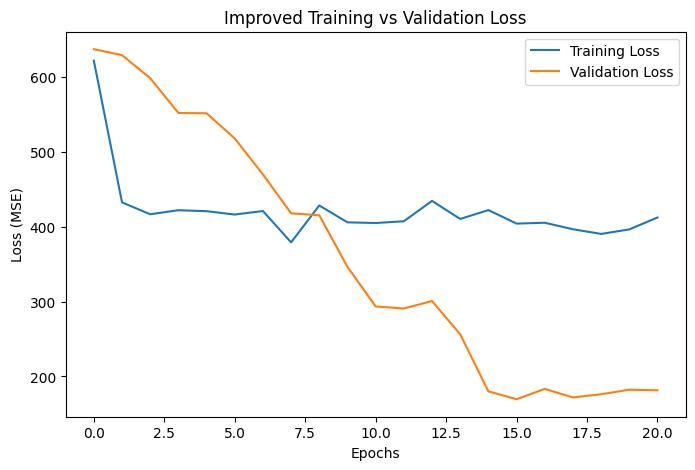

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Improved Training vs Validation Loss")
plt.legend()
plt.show()


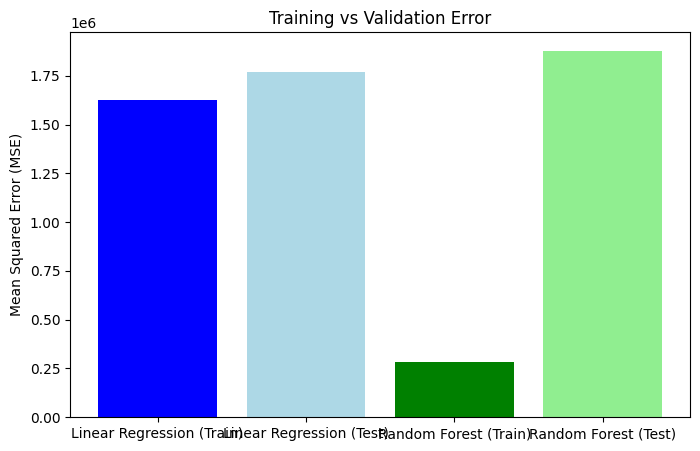

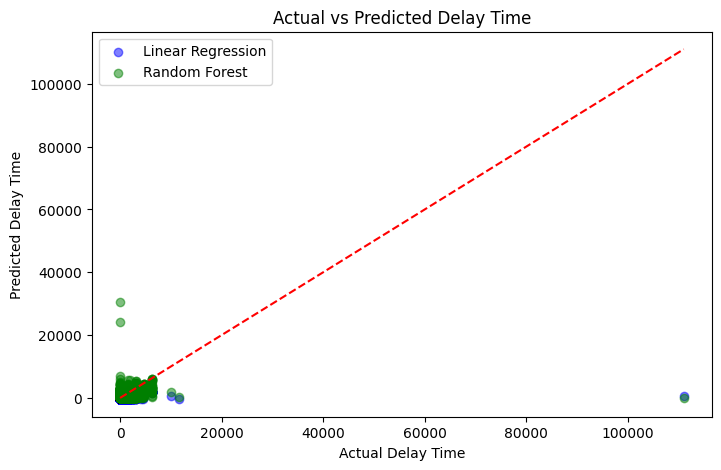

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

# Random Forest
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.bar(["Linear Regression (Train)", "Linear Regression (Test)",
         "Random Forest (Train)", "Random Forest (Test)"],
        [mse_train_lr, mse_test_lr, mse_train_rf, mse_test_rf],
        color=["blue", "lightblue", "green", "lightgreen"])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation Error")
plt.show()

# Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred_lr, color="blue", alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_test_pred_rf, color="green", alpha=0.5, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Delay Time")
plt.ylabel("Predicted Delay Time")
plt.title("Actual vs Predicted Delay Time")
plt.legend()
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print results
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}")
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}")
print(f"CNN - MAE: {mae_cnn}, MSE: {mse_cnn}")


Linear Regression - MAE: 545.0623078072219, MSE: 1771783.4988337052
Random Forest - MAE: 408.74506974609454, MSE: 1879181.1116379104
CNN - MAE: 418.8877001475954, MSE: 1692281.0847100096


In [13]:
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):
        time_str = time_str.lower().replace("mns", "").replace("min", "").strip()
        try:
            return float(time_str)
        except ValueError:
            return np.nan
    return time_str

df_ny_bus_delay['How_Long_Delayed'] = df_ny_bus_delay['How_Long_Delayed'].apply(convert_time_to_minutes)
df_ny_bus_delay.dropna(inplace=True)

In [14]:
def convert_to_numeric(value):
    # Handle time ranges like '45-50 MIN' by calculating the average of the range
    if isinstance(value, str):
        if '-' in value:  # Case for range (e.g., '45-50 MIN')
            range_values = value.split('-')
            try:
                return (float(range_values[0]) + float(range_values[1].split()[0])) / 2
            except ValueError:
                return np.nan  # Return NaN if the range values can't be converted to float
        elif 'HR' in value:  # Case for hours (e.g., '1HR')
            try:
                return float(value.split('HR')[0]) * 60  # Convert hours to minutes
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        elif 'MIN' in value:  # Case for minutes (e.g., '45 MIN')
            try:
                return float(value.split('MIN')[0])
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        else:
            try:
                return float(value)  # Try to directly convert to float if it's a number
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return np.nan  # In case it's not a string, return NaN

# Apply the function to the 'How_Long_Delayed' column
df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(convert_to_numeric)

# Check the results after cleaning
print(df['How_Long_Delayed'].head())


1   NaN
2   NaN
3   NaN
5   NaN
6   NaN
Name: How_Long_Delayed, dtype: float64


In [15]:
label_encoders = {}
categorical_features = ['Run_Type', 'Reason', 'Boro', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']

for col in categorical_features:
    le = LabelEncoder()
    df_ny_bus_delay[col] = le.fit_transform(df_ny_bus_delay[col])
    label_encoders[col] = le

In [16]:
features = ['Run_Type', 'Reason', 'Boro', 'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'Number_Of_Students_On_The_Bus']
target = 'How_Long_Delayed'

X = df_ny_bus_delay[features]
y = df_ny_bus_delay[target]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

# Load dataset
df = pd.read_csv("bus-breakdown-and-delays.csv", low_memory=False)

# Convert 'Occurred_On' to datetime and extract features
df["Occurred_On"] = pd.to_datetime(df["Occurred_On"], errors='coerce')
df["Year"] = df["Occurred_On"].dt.year
df["Month"] = df["Occurred_On"].dt.month
df["Day"] = df["Occurred_On"].dt.day

# Drop rows with missing "Reason" or "Boro"
df.dropna(subset=["Reason", "Boro"], inplace=True)

# Encode 'Reason'
label_enc_reason = LabelEncoder()
df["Reason"] = label_enc_reason.fit_transform(df["Reason"])

# Encode 'Boro' (Borough)
label_enc_boro = LabelEncoder()
df["Boro"] = label_enc_boro.fit_transform(df["Boro"])

# Convert 'How_Long_Delayed' to numerical values
def parse_delay(x):
    if pd.isna(x):
        return np.nan
    x = ''.join(filter(str.isdigit, str(x)))  # Extract numeric part
    return int(x) if x.isdigit() else np.nan  # Convert only if valid

df["How_Long_Delayed"] = df["How_Long_Delayed"].apply(parse_delay)

# Drop rows with missing delay values
df = df.dropna(subset=["How_Long_Delayed"])

# Select features (Year, Month, Day, Reason, Boro) and target (Delay)
X = df[["Year", "Month", "Day", "Reason", "Boro"]]
y = df["How_Long_Delayed"]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_scaled, y)

# ---- Function to Predict Delay ---- #
def predict_delay():
    # Get user input
    date_input = input("Enter a date (YYYY-MM-DD): ")

    try:
        input_date = datetime.strptime(date_input, "%Y-%m-%d")
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")
        return

    print("\nAvailable reasons:")
    for i, reason in enumerate(label_enc_reason.classes_):
        print(f"{i + 1}. {reason}")

    reason_input = input("\nEnter the reason for the delay (exact match from list above): ")

    # Check if the reason exists
    if reason_input not in label_enc_reason.classes_:
        print("Invalid reason. Please enter an exact match from the list above.")
        return

    # Encode the reason
    reason_encoded = label_enc_reason.transform([reason_input])[0]

    print("\nAvailable boroughs:")
    for i, boro in enumerate(label_enc_boro.classes_):
        print(f"{i + 1}. {boro}")

    boro_input = input("\nEnter the borough (exact match from list above): ")

    # Check if the borough exists
    if boro_input not in label_enc_boro.classes_:
        print("Invalid borough. Please enter an exact match from the list above.")
        return

    # Encode the borough
    boro_encoded = label_enc_boro.transform([boro_input])[0]

    # Create feature array
    input_features = np.array([[input_date.year, input_date.month, input_date.day, reason_encoded, boro_encoded]])

    # Scale the features
    input_scaled = scaler.transform(input_features)

    # Predict delay
    predicted_delay = rf_reg.predict(input_scaled)[0]

    print(f"\n🚍 Predicted delay on {date_input} in {boro_input} due to '{reason_input}': {max(0, round(predicted_delay))} minutes")

# ---- Run Prediction ---- #
predict_delay()


Enter a date (YYYY-MM-DD): 2015-11-05

Available reasons:
1. Accident
2. Delayed by School
3. Flat Tire
4. Heavy Traffic
5. Late return from Field Trip
6. Mechanical Problem
7. Other
8. Problem Run
9. Weather Conditions
10. Won`t Start

Enter the reason for the delay (exact match from list above): Heavy Traffic

Available boroughs:
1. All Boroughs
2. Bronx
3. Brooklyn
4. Connecticut
5. Manhattan
6. Nassau County
7. New Jersey
8. Queens
9. Rockland County
10. Staten Island
11. Westchester

Enter the borough (exact match from list above): Manhattan

🚍 Predicted delay on 2015-11-05 in Manhattan due to 'Heavy Traffic': 155 minutes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
